# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `spamham.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

Kuang-Yu Li, st169971@stud.uni-stuttgart.de, 3440829
Ya Jen Hsu, st169013@stud.uni-stuttgart.de, 3449448
Gabriella Ilena, st169935@stud.uni-stuttgart.de, 3440942

In [18]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_spamham_dataset():
    import string
    
    with open('spamham.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_spamham_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[2]}: {X[2]}')

Sample:
ham: ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
spam: ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']


## Task 2: Spam Classification with Naive Bayes

Check out the description of the dataset at [https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is spam or ham (not spam).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'spam'` and `'ham'`.

Fill out the methods in `NaiveBayesSpamClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [19]:
# Implement your solution here.
class NaiveBayesSpamClassifier(object):
    
    def __init__(self):
        self.priors = list()
        self.dict_cond_prob = dict()
        pass
    
    def fit(self, X, y):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        y is a list of `n` labels either the string 'spam' or the string 'ham'.
        """
        assert len(X) == len(y), 'Train data and target label length not match'
        
        # Calculate priors based on the class labels in y
        label_count = {'spam': 0, 'ham': 0}
        for label in y:
            if type(label) == str and label == 'spam': # Checking the type just in case
                label_count['spam'] += 1
            elif type(label) == str and label == 'ham':
                label_count['ham'] += 1
        prior_spam = label_count['spam'] / len(y) # Number of spam over all elements
        prior_ham = label_count['ham'] / len(y) # Number of ham over all elements
        self.priors = [prior_spam, prior_ham]

        # Printing for testing purposes only
        # print(label_count)
        # print(priors)
        assert sum(label_count.values()) == len(y), 'length of lable count.values not match'

        # Create a bag of words for each class label and count the word frequency
        # Add to global vocabulary
        bag_words = {'spam':{}, 'ham':{}}

        for x_, y_ in zip(X, y):

            word_count = {}
            # Go through each word in current class label
            for word in x_:
                word_count[word] = word_count.get(word, 0) + 1

            # Iterate over the dictionary
            for word, count in word_count.items():
                # If the word is not in this class
                if word not in bag_words[y_]:
                    bag_words[y_][word] = 0
                # Add the words to relevant bag of words
                bag_words[y_][word] += count
        
        # Print to test result
        # print(bag_words)
        
        
        # Goal creating a dictionary with {string: [P(string|ham), P(string|ham)]}
        # key being a string in_string
        # value being a ndarray, storing conditional_prob for in_string'ham' and 'spam'
        #  Term | ham | spam
        #  strA | 50 (-> 50/120) | 60
        #  strB | 70 (-> 70/120) | 90
        #  sum  | 120 (-> 120/120) | 150
        
        # Step-1: iterating through all items in X and adding them to dictionary with thier occurance
        dict_cond_prob = dict()
        dict_word_freq = dict()
        y_count = np.array([label_count['ham'], label_count['spam']], dtype=float)
        print('y_count', y_count)
        for index in range(len(X)):
            for x in X[index]:
                if x in dict_word_freq:
                    x_freq = dict_word_freq[x]
                    if y[index] == 'ham':
                        x_freq[0] += 1
                    else:
                        x_freq[1] += 1
                else:
                    if y[index] == 'ham':
                        dict_word_freq[x] = np.array([1, 0], dtype=float)
                    else:
                        dict_word_freq[x] = np.array([0, 1], dtype=float)
                        

             
        # Step-2: summing up all occurrance to calculate the conditional probability
        for k, v in dict_word_freq.items():
            self.dict_cond_prob[k] = (dict_word_freq[k] + np.ones(2))/ (y_count + len(y)*(np.ones(2)))
        pass
    
    def predict(self, X):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        The method returns a list of `n` strings, i.e. classification labels ('spam' or 'ham').
        """
        y_pred = list()
        for x in X:
            total_prab = np.log(np.array(self.priors, dtype=float))
            for x_element in x:
                if x_element in self.dict_cond_prob.keys():
                    total_prab += np.log(self.dict_cond_prob[x_element])
            if total_prab[0] > total_prab[1]:
                pred = 'ham'
            else:
                pred = 'spam'               
            y_pred.append(pred)
        return y_pred
    pass

# Testing
def test_NB(X, y):
    myNB = NaiveBayesSpamClassifier()
    myNB.fit(X, y)

    y_pred = myNB.predict(X)
    assert (y_pred_ == y_ for y_pred_, y_ in zip(y_pred, y)), 'prediction error'

test_NB(X[:10], y[:10])  

y_count [6. 4.]


y_count [3382.  519.]


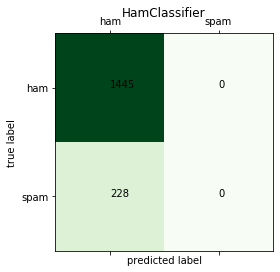

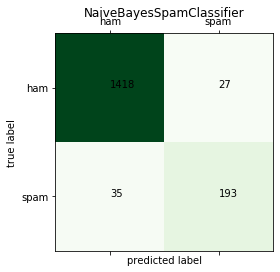

In [20]:
# The following code will evaluate your classifier.
class HamClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['ham']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['ham', 'spam'])
    
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'ham', 'spam'])
    ax.set_yticklabels(['', 'ham', 'spam'])
    ax.set_title(classifier_name)

    
    
ham_classifier = HamClassifier()
your_classifier = NaiveBayesSpamClassifier()
ham_cmatrix = train_evaluate(ham_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(ham_cmatrix, 'HamClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesSpamClassifier')